### 3. Model Processing
This stage involves the application of a tuned clustering algorithm to the data. The clustering algorithm will group similar data points together, and evaulate the homogeniety of the classes of the clusters (the similiarity of professors in the same departments). This step allows us to identify patterns and relationships within the data.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import SpectralClustering, AffinityPropagation, KMeans, MiniBatchKMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

random_seed = 0

df = pd.read_csv("data/combined_data.csv")
X = df[['Quality Score', 'Difficulty Score', 'GPA']]
y = df['College']

# Silhouette Scorer function
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

#### Plot of Colleges for Reference

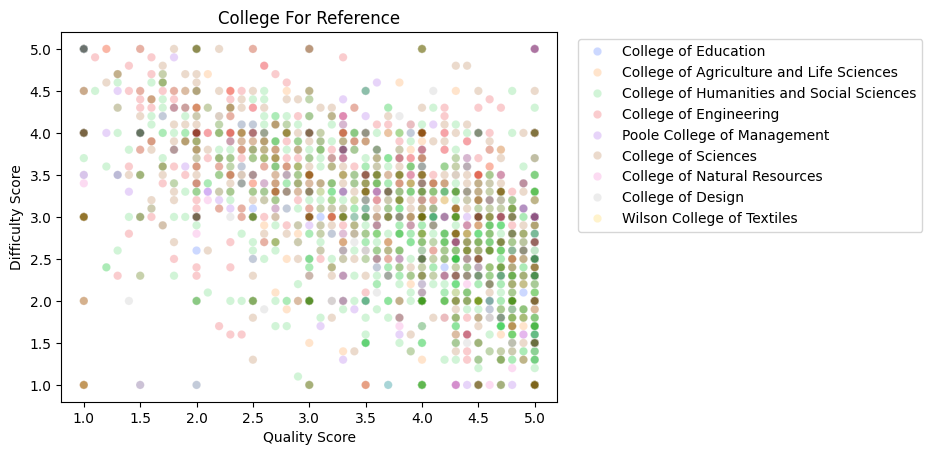

In [ ]:
# Plot of Colleges For Reference
sns.scatterplot(x=X['Quality Score'], y=X['Difficulty Score'], hue=y, palette='bright', alpha=0.2)
plt.legend(bbox_to_anchor=(1.75, 1), loc='upper right')
plt.title("College For Reference")
plt.xlabel("Quality Score")
plt.ylabel("Difficulty Score")
plt.show()

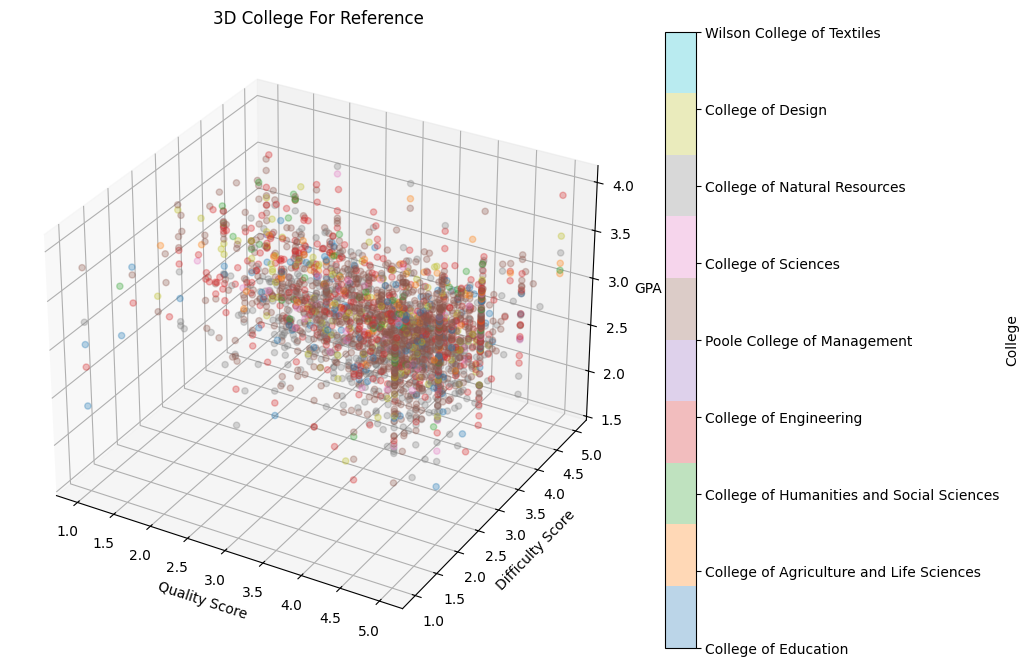

In [ ]:
# 3d representation for college for refrence plot
# Filtering out rows with NaN values in y 
valid_indices = y.notna()
X_valid = X[valid_indices]
y_valid = y[valid_indices]

# Set up 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# the scatter plot with three axes
sc = ax.scatter(X_valid['Quality Score'], X_valid['Difficulty Score'], X_valid['GPA'], 
                c=y_valid.astype('category').cat.codes, cmap='tab10', alpha=0.3)

# Addong axis labels
ax.set_xlabel("Quality Score")
ax.set_ylabel("Difficulty Score")
ax.set_zlabel("GPA")
ax.set_title("3D College For Reference")

# Adding color bar and legend
cbar = plt.colorbar(sc, ax=ax, label='College')
cbar.set_ticks(range(len(y_valid.unique())))
cbar.set_ticklabels(y_valid.unique())

plt.show()



#### Spectral Clustering

In [ ]:
# Spectral Clustering With PCA
spectral_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('sc', SpectralClustering(random_state=random_seed))
])

# Define param grid for GridSearchCV
param_grid = {
    "pca__n_components": [2, 3],  # Testing different PCA components
    "sc__n_clusters": [3, 4, 5, 6, 7, 8, 9, 10],
    "sc__eigen_solver": ['arpack', 'lobpcg'],
    "sc__affinity": ['nearest_neighbors', 'rbf'],
}

# Grid search with silhouette scoring
grid_search = GridSearchCV(spectral_pipeline, param_grid, scoring=silhouette_scorer)
grid_search.fit(X)


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('sc',
                                        SpectralClustering(random_state=0))]),
             param_grid={'pca__n_components': [2, 3],
                         'sc__affinity': ['nearest_neighbors', 'rbf'],
                         'sc__eigen_solver': ['arpack', 'lobpcg'],
                         'sc__n_clusters': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring=<function silhouette_scorer at 0x2a9783c40>)

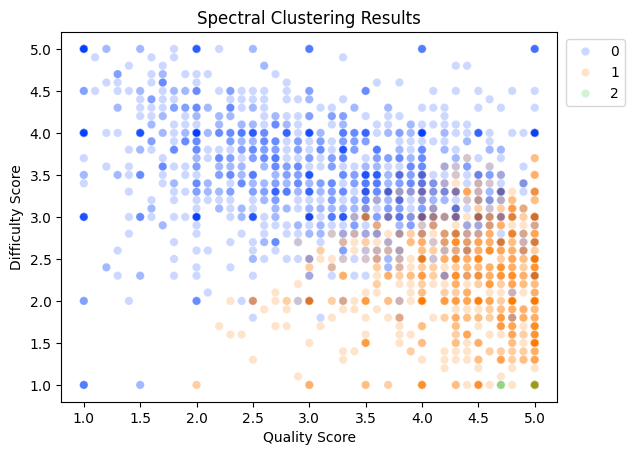

In [ ]:
# Best estimator
best_spectral = Pipeline([('scaler', StandardScaler()), 
                          ('pca', PCA(n_components=3)), 
                          ('sc', SpectralClustering(n_clusters=3, eigen_solver='lobpcg', affinity='nearest_neighbors', random_state=random_seed))])
output = best_spectral.fit_predict(X)

# Plot Spectral Clustering Results
sns.scatterplot(x=X['Quality Score'], y=X['Difficulty Score'], hue=output, palette='bright', alpha=0.2)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
plt.title("Spectral Clustering Results")
plt.xlabel("Quality Score")
plt.ylabel("Difficulty Score")
plt.show()

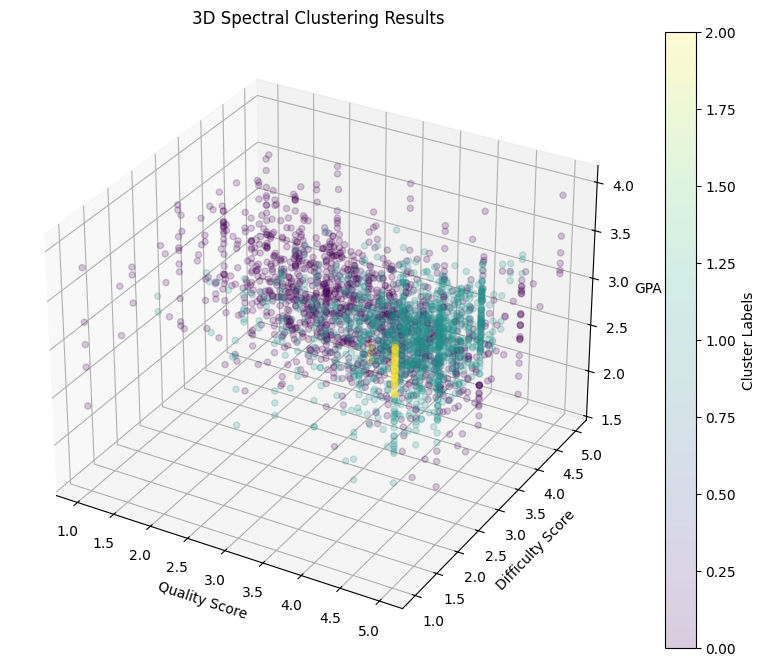

In [ ]:
# 3d Representation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three axes
sc = ax.scatter(X['Quality Score'], X['Difficulty Score'], X['GPA'], c=output, cmap='viridis', alpha=0.2)

# Adding axis labels
ax.set_xlabel("Quality Score")
ax.set_ylabel("Difficulty Score")
ax.set_zlabel("GPA")
ax.set_title("3D Spectral Clustering Results")

# Adding color bar for clarity
plt.colorbar(sc, label='Cluster Labels')

# Display the plot
plt.show()
 

#### Affinity Propagation

In [ ]:
# Affinity Propagation With PCA
affinity_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()), 
    ('ap', AffinityPropagation(random_state=random_seed))])

# Define param grid for GridSearchCV
param_grid = {
    "pca__n_components": [2, 3],  # Testing different PCA components
    "ap__damping": [0.5, 0.6, 0.7, 0.8, 0.9],
}

# Grid search with silhouette scoring
grid_search = GridSearchCV(affinity_pipeline, param_grid, scoring=silhouette_scorer)
grid_search.fit(X)

c:\Users\ndl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\ndl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\ndl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\ndl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
 

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('ap',
                                        AffinityPropagation(random_state=0))]),
             param_grid={'ap__damping': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'pca__n_components': [2, 3]},
             scoring=<function silhouette_scorer at 0x0000021AF847F740>)

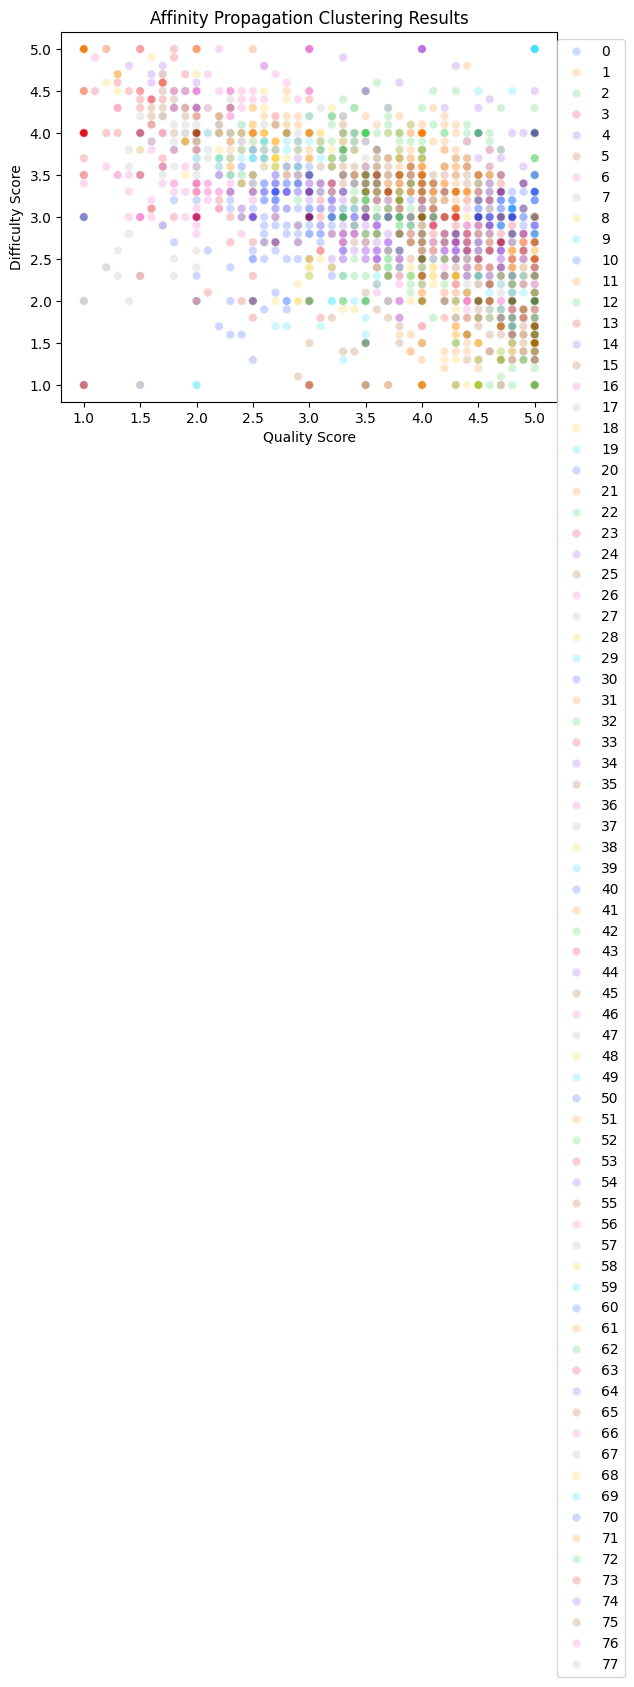

In [ ]:
best_affinity = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('ap', AffinityPropagation(damping=0.8, random_state=random_seed))])
output = best_affinity.fit_predict(X)
sns.scatterplot(x=X['Quality Score'], y=X['Difficulty Score'], hue=output, palette='bright', alpha=0.2)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
plt.title("Affinity Propagation Clustering Results")
plt.xlabel("Quality Score")
plt.ylabel("Difficulty Score")
plt.show()

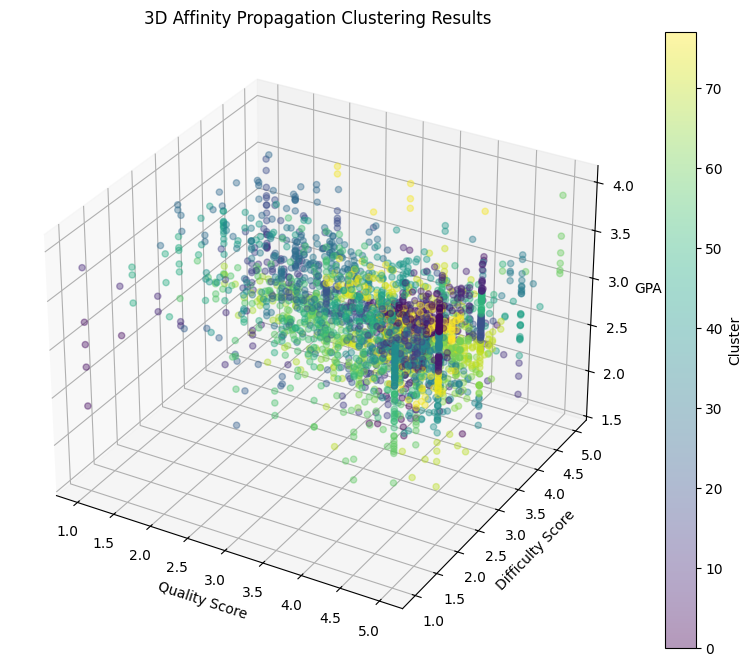

In [ ]:
# Set up
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot with appropriate alpha 
sc = ax.scatter(X['Quality Score'], X['Difficulty Score'], X['GPA'], 
                c=output, cmap='viridis', alpha=0.4)
# Adding labels
ax.set_xlabel("Quality Score")
ax.set_ylabel("Difficulty Score")
ax.set_zlabel("GPA")
ax.set_title("3D Affinity Propagation Clustering Results")

# Adding legend
cbar = plt.colorbar(sc, ax=ax, label='Cluster')
plt.show()

#### KMeans

In [ ]:
# KMeans
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()), 
    ('km', KMeans(random_state=random_seed))])
param_grid = {
    "pca__n_components": [2, 3],
    "km__n_clusters": [3, 4, 5, 6, 7, 8, 9, 10],
    "km__algorithm": ['lloyd', 'elkan'],
}
grid_search = GridSearchCV(kmeans_pipeline, param_grid, scoring=silhouette_scorer)
grid_search.fit(X)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('km', KMeans(random_state=0))]),
             param_grid={'km__algorithm': ['lloyd', 'elkan'],
                         'km__n_clusters': [3, 4, 5, 6, 7, 8, 9, 10],
                         'pca__n_components': [2, 3]},
             scoring=<function silhouette_scorer at 0x2a9783c40>)

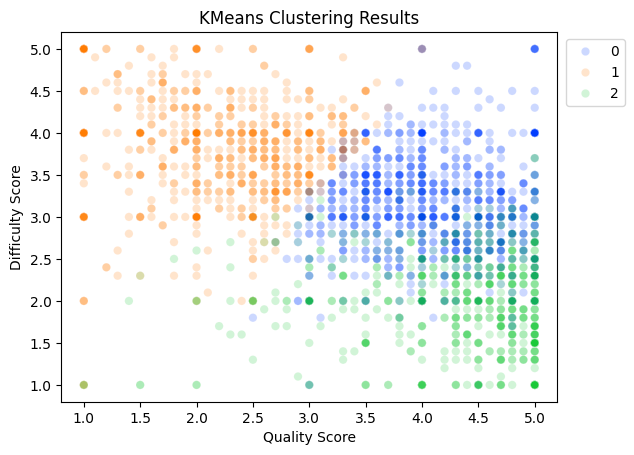

In [ ]:
# Run the Best KMeans Clustering Estimator
best_kmeans = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)), 
    ('km', KMeans(n_clusters=3, random_state=random_seed))])
output = best_kmeans.fit_predict(X)
sns.scatterplot(x=X['Quality Score'], y=X['Difficulty Score'], hue=output, palette='bright', alpha=0.2)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
plt.title("KMeans Clustering Results")
plt.xlabel("Quality Score")
plt.ylabel("Difficulty Score")
plt.show()

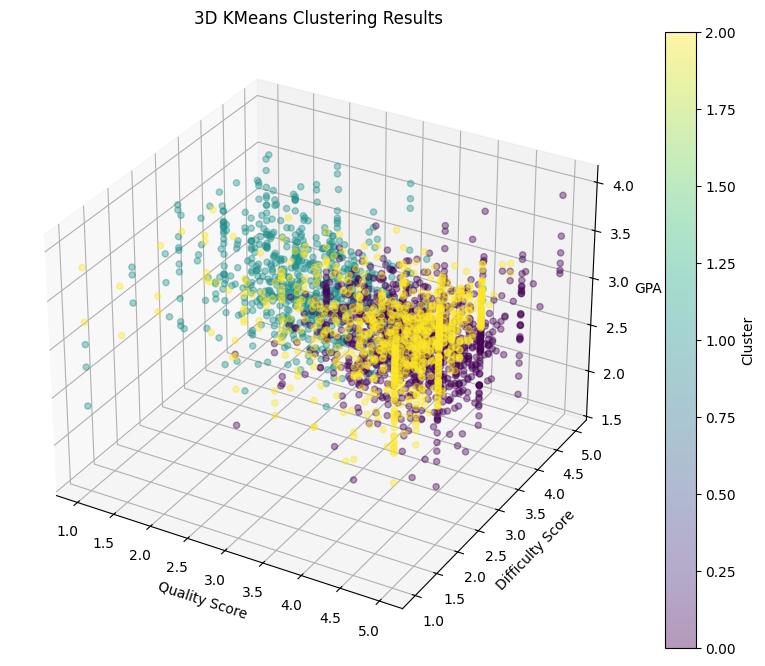

In [ ]:
# Set up
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot with appropriate alpha 
sc = ax.scatter(X['Quality Score'], X['Difficulty Score'], X['GPA'], 
                c=output, cmap='viridis', alpha=0.4)
# Adding labels
ax.set_xlabel("Quality Score")
ax.set_ylabel("Difficulty Score")
ax.set_zlabel("GPA")
ax.set_title("3D KMeans Clustering Results")

# Adding legend
cbar = plt.colorbar(sc, ax=ax, label='Cluster')
plt.show()

#### Mini Batch KMeans

In [ ]:
# Mini Batch KMeans
mini_batch_kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('mbkm', MiniBatchKMeans(random_state=random_seed))])
param_grid = {
    "pca__n_components": [2, 3],
    "mbkm__n_clusters": [3, 4, 5, 6, 7, 8, 9, 10],
}
grid_search = GridSearchCV(mini_batch_kmeans_pipeline, param_grid, scoring=silhouette_scorer)
grid_search.fit(X)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('mbkm',
                                        MiniBatchKMeans(random_state=0))]),
             param_grid={'mbkm__n_clusters': [3, 4, 5, 6, 7, 8, 9, 10],
                         'pca__n_components': [2, 3]},
             scoring=<function silhouette_scorer at 0x2a9783c40>)

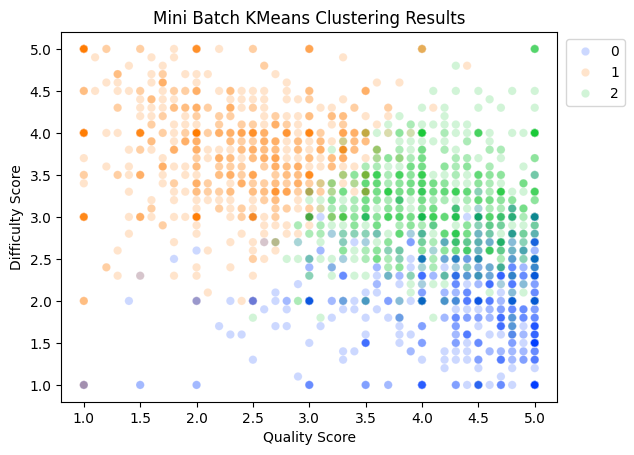

In [ ]:
# Run the Best Mini Batch KMeans Clustering Estimator
best_mbkmeans = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('mbkm', MiniBatchKMeans(n_clusters=3, random_state=random_seed))])
output = best_mbkmeans.fit_predict(X)
sns.scatterplot(x=X['Quality Score'], y=X['Difficulty Score'], hue=output, palette='bright', alpha=0.2)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
plt.title("Mini Batch KMeans Clustering Results")
plt.xlabel("Quality Score")
plt.ylabel("Difficulty Score")
plt.show()

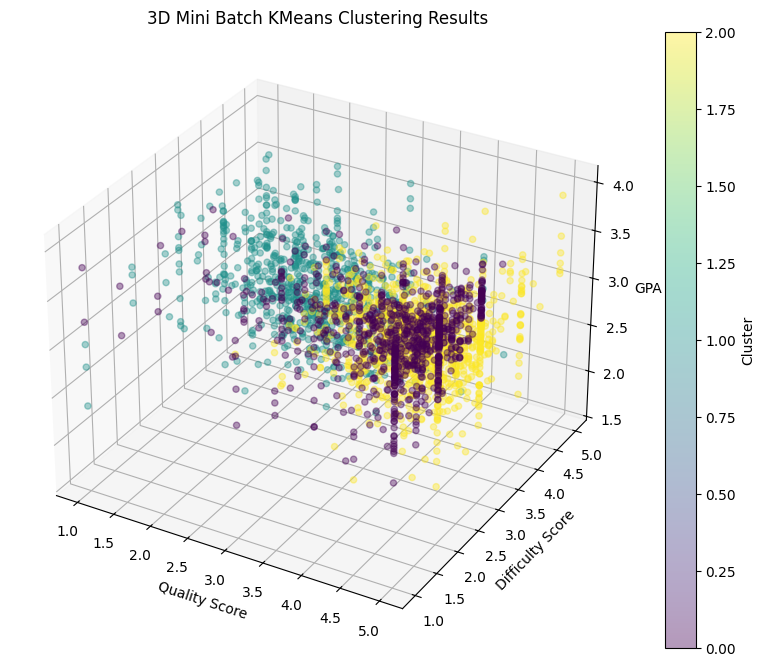

In [ ]:
# Set up
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot with appropriate alpha 
sc = ax.scatter(X['Quality Score'], X['Difficulty Score'], X['GPA'], 
                c=output, cmap='viridis', alpha=0.4)
# Adding labels
ax.set_xlabel("Quality Score")
ax.set_ylabel("Difficulty Score")
ax.set_zlabel("GPA")
ax.set_title("3D Mini Batch KMeans Clustering Results")

# Adding legend
cbar = plt.colorbar(sc, ax=ax, label='Cluster')
plt.show()

#### Agglomerative Clustering

In [ ]:
# Agglomerative Clustering
agglo_cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA()),
    ('ac', AgglomerativeClustering())])
param_grid = {
    "pca__n_components": [2, 3],
    "ac__n_clusters": [3, 4, 5, 6, 7, 8, 9, 10],
    "ac__linkage": ['ward', 'complete', 'average', 'single'],
}
grid_search = GridSearchCV(agglo_cluster_pipeline, param_grid, scoring=silhouette_scorer)
grid_search.fit(X)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('ac', AgglomerativeClustering())]),
             param_grid={'ac__linkage': ['ward', 'complete', 'average',
                                         'single'],
                         'ac__n_clusters': [3, 4, 5, 6, 7, 8, 9, 10],
                         'pca__n_components': [2, 3]},
             scoring=<function silhouette_scorer at 0x0000021AF847F740>)

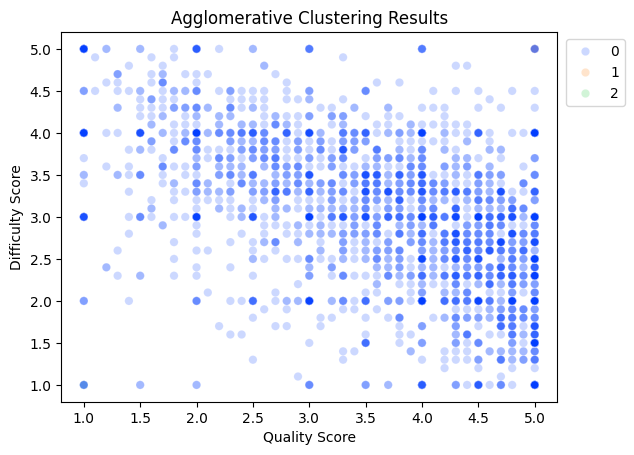

In [ ]:
# Run the Best Agglomerative Clustering Estimator
best_agglo = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=3)),
    ('ac', AgglomerativeClustering(linkage='single', n_clusters=3))])
output = best_agglo.fit_predict(X)
sns.scatterplot(x=X['Quality Score'], y=X['Difficulty Score'], hue=output, palette='bright', alpha=0.2)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
plt.title("Agglomerative Clustering Results")
plt.xlabel("Quality Score")
plt.ylabel("Difficulty Score")
plt.show()

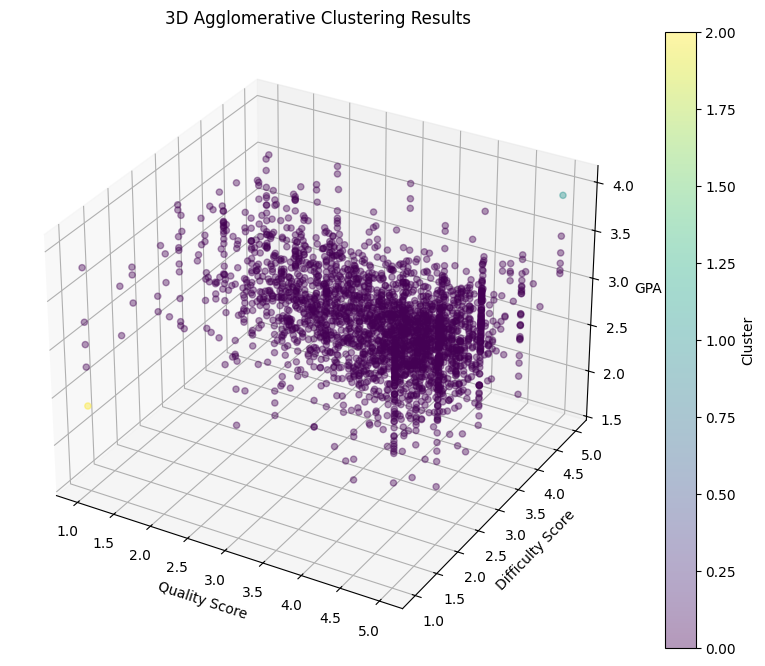

In [ ]:
# Set up
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot with appropriate alpha 
sc = ax.scatter(X['Quality Score'], X['Difficulty Score'], X['GPA'], 
                c=output, cmap='viridis', alpha=0.4)
# Adding labels
ax.set_xlabel("Quality Score")
ax.set_ylabel("Difficulty Score")
ax.set_zlabel("GPA")
ax.set_title("3D Agglomerative Clustering Results")

# Adding legend
cbar = plt.colorbar(sc, ax=ax, label='Cluster')
plt.show()

#### Gaussian Mixtures

In [ ]:
# Gaussian Mixtures
gaussian_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA()),
    ('ga', GaussianMixture(random_state=random_seed))])
param_grid = {
    "pca__n_components": [2, 3],
    "ga__n_components": [1, 2, 3],
    "ga__covariance_type": ['full', 'tied', 'diag', 'spherical'],
    "ga__init_params": ['kmeans', 'k-means++', 'random', 'random_from_data'],
}
grid_search = GridSearchCV(gaussian_pipeline, param_grid, scoring=silhouette_scorer)
grid_search.fit(X)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/yz/wsk5kn155yl051wgm5j2nr_c0000gn/T/ipykernel_15229/1454078742.py", line 23, in silhouette_scorer
    return silhouette_score(X, labels)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('ga',
                                        GaussianMixture(random_state=0))]),
             param_grid={'ga__covariance_type': ['full', 'tied', 'diag',
                                                 'spherical'],
                         'ga__init_params': ['kmeans', 'k-means++', 'random',
                                             'random_from_data'],
                         'ga__n_components': [1, 2, 3],
                         'pca__n_components': [2, 3]},
             scoring=<function silhouette_scorer at 0x2a9783c40>)

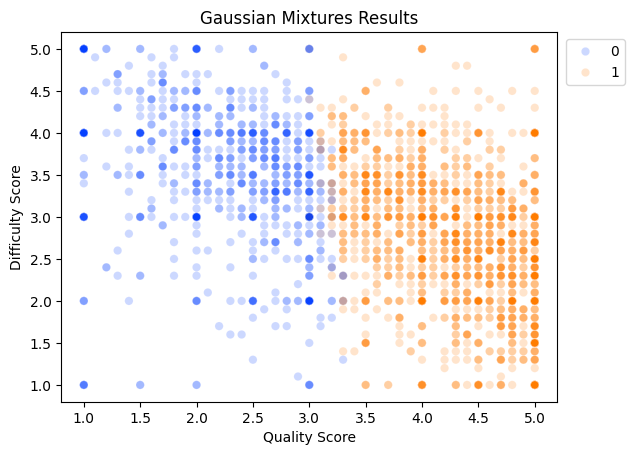

In [ ]:
# Run the Best Gaussian Mixtures Estimator
best_gaussian = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=3)),
    ('ga', GaussianMixture(covariance_type='tied', n_components=2, random_state=random_seed))])
output = best_gaussian.fit_predict(X)
sns.scatterplot(x=X['Quality Score'], y=X['Difficulty Score'], hue=output, palette='bright', alpha=0.2)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
plt.title("Gaussian Mixtures Results")
plt.xlabel("Quality Score")
plt.ylabel("Difficulty Score")
plt.show()

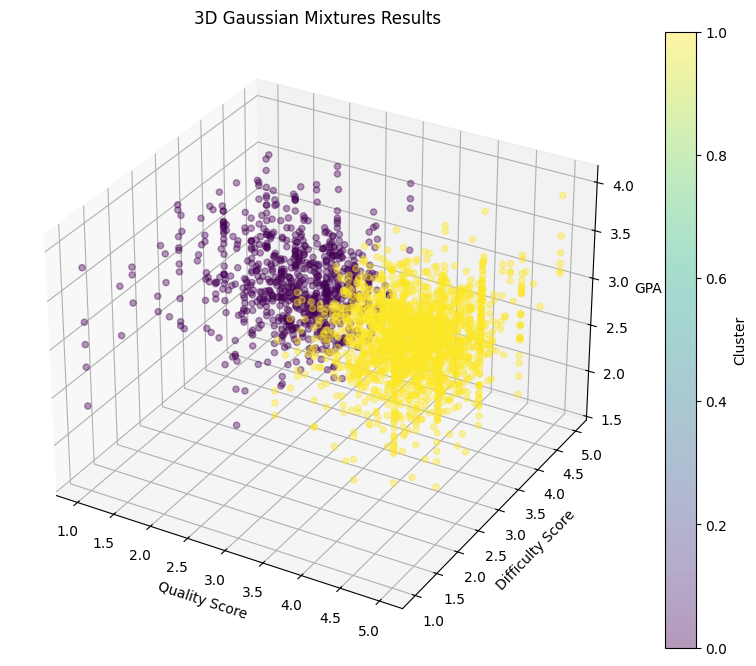

In [ ]:
# Set up
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot with appropriate alpha 
sc = ax.scatter(X['Quality Score'], X['Difficulty Score'], X['GPA'], 
                c=output, cmap='viridis', alpha=0.4)
# Adding labels
ax.set_xlabel("Quality Score")
ax.set_ylabel("Difficulty Score")
ax.set_zlabel("GPA")
ax.set_title("3D Gaussian Mixtures Results")

# Adding legend
cbar = plt.colorbar(sc, ax=ax, label='Cluster')
plt.show()